In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib.mlab as mlab
from astropy.io import fits
import pylab as pl
import os
import matplotlib.lines as mlines
% matplotlib inline

In [3]:
# Function developed to find the index of values in the most populated bin of 2D histogram (Developed by Graham)
def find_index(x_val, y_val, x_range, y_range, x_ind, y_ind):
    xmin=x_range[x_ind]
    xmax=x_range[x_ind+1]
    ymin=y_range[y_ind]
    ymax=y_range[y_ind+1]
    x_true=np.where(np.logical_and(x_val>=xmin,x_val<xmax))[0]
    y_true=np.where(np.logical_and(y_val>=ymin, y_val<ymax))[0]
    true_indicies=[i for i in x_true if i in y_true]
    return true_indicies #Returns the indicies for the 2MASSID 

In [13]:
# Upload files that have infinity values extracted
DR13_R,DR13_xr = np.loadtxt('DR13_Rmin_XR_Max.lis',usecols=[2,4], skiprows=1,unpack=True, dtype=float)
DR13_massID = np.loadtxt('DR13_Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[1])
DR13_field = np.loadtxt('DR13_Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[0])


163660


In [5]:
x=np.where(np.logical_and(DR13_xr>= 68.0 , DR13_R <= 12.0))
fs = DR13_field[x]
ms = DR13_massID[x]
xrs=DR13_xr[x]
Rvals=DR13_R[x]
outage = open('Refined_DR13_Potential_Binaries.csv', 'w')
for i in range(len(fs)):
    #print(DR13_massID[x])
    outage.write(str(fs[i]) + ',' +str(ms[i])+','+str(xrs[i])+',' +str(Rvals[i])+'\n')
outage.close()
print(len(DR13_massID[x]))

15701


In [6]:
# Finding the mode of the potential binary list
occurances ={}
for i in xrs:
    try:
        occurances[i]+= 1
    except(KeyError):
            occurances[i] = 1
#print(occurances)

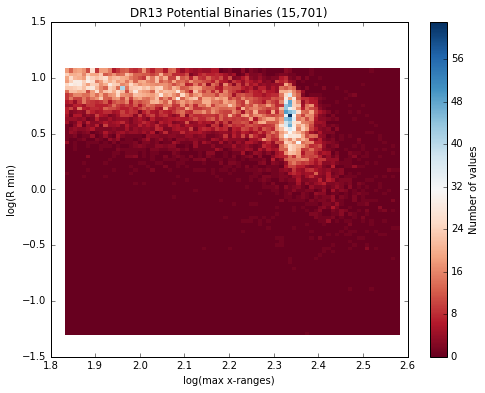

In [7]:
# Plotting the list that satisfied the binary behavior signatures (high x-range and low R min values)
x_vals, y_vals = np.loadtxt('Refined_DR13_Potential_Binaries.csv',delimiter=',',usecols=[2,3],unpack=True, dtype=float)
xval=[]
Rval=[]
for i in range(len(x_vals)):
    #xval.append(math.log10(x_vals[i]))
    xval.append(math.log10(x_vals[i]))
    #Rval.append(math.log10(y_vals[i]))
    Rval.append(math.log10(y_vals[i]))
    
percentBin = 0.005
BinCount = int(percentBin*len(xval))
Grid, x_ranges, y_ranges = np.histogram2d(xval, Rval, bins=BinCount, range=None, normed=False, weights=None)

Grid = np.rot90(Grid)
Grid = np.flipud(Grid)

plt.figure(figsize=(8,6))
Z = plt.pcolor(x_ranges, y_ranges,Grid, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('DR13 Potential Binaries (15,701)')
plt.savefig('Refined DR13 Potential Binaries (15,701).jpg', bbox_inches='tight')

MaxGrid  = np.argmax(Grid)#Returns the indices of the maximum values along an axis
t1 = MaxGrid%Grid.shape[0]
t2 = MaxGrid/Grid.shape[0]
# Reports the index in the large appended list where the star is located along with its associated max x-range & R min
found_indicies=find_index(xval, Rval, x_ranges, y_ranges, t1, t2)

#print("The algorithm found {0} indicies".format(found_indicies)) 
# Prints the associated 2MASSID and fields with the found indicies
#print(ms[found_indicies])
#print(fs[found_indicies])
#Print associated max x-range values
#print(xrs[found_indicies])
#Print associated R min values 
#print(Rvals[found_indicies])

#Writing a file to hold the information for most populated bins
revfield = fs[found_indicies]
revmass = ms[found_indicies]
revx = xrs[found_indicies]
revr = Rvals[found_indicies]

outs = open('DR13 PB Populated Bins.lis','w')
for i in range(len(revfield)):
    outs.write(str(revfield[i])+ '\t'+str(revmass[i])+'\t'+str(revx[i])+'\t'+str(revr[i])+'\n')
outs.close()


5375


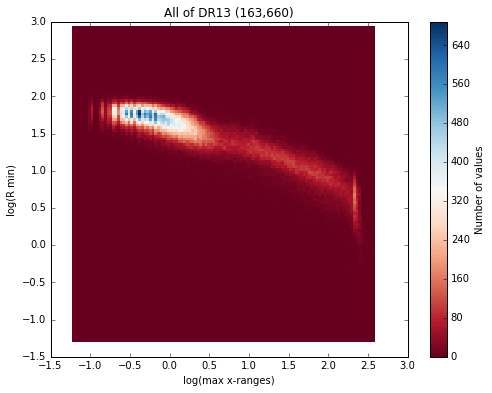

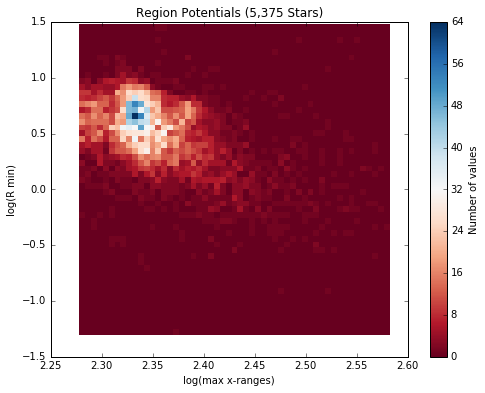

In [49]:
outfile = open('DR13_Log_Values_for_Stars.csv','w')
xmax=[]
R=[]
for i in range(len(DR13_xr)):
    xmax.append(math.log10(DR13_xr[i]))
    R.append(math.log10(DR13_R[i]))
    outfile.write(str(xmax[i])+'\t'+str(R[i])+'\n')     
outfile.close()

#print [x_max for x_max in xmax if not math.isnan(x_max)]
#print [Rmin for Rmin in R if not math.isnan(Rmin)]
#xmax.remove(xmax[4859]) # Remove the associated max x-ranges from the list to keep consistant sizes
#xmax.remove(xmax[5450])
#xmax.remove(xmax[4859])
#xmax.remove(xmax[5450])
#xmax.remove(xmax[31200])
#xmax.remove(xmax[121925])
#xmax.remove(xmax[139596])
#xmax.remove(xmax[147090])
#xmax.remove(xmax[147255])
#xmax.remove(xmax[159955])
#x_max = np.array(xmax)
#Rmin = [Rmin for Rmin in R if not math.isinf(Rmin)] # Remove the inf values from the list
#print(Rmin)
#Locating the indexes of the corresponding x-maxs to the inf Rmin values
#indexes = [i for i,Rmin in enumerate(Rmin) if Rmin == math.isinf(Rmin)] 
#print(indexes)
#print(len(x_max))
#print(len(Rmin))

perceBin = 0.0007
binCount = int(perceBin*len(xmax))
grid, x_range, y_range = np.histogram2d(xmax, R, bins=binCount, range=None, normed=False, weights=None)

grid = np.rot90(grid)
grid = np.flipud(grid)

plt.figure(figsize=(8,6))
Z = plt.pcolor(x_range, y_range,grid, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('All of DR13 (163,660)')
plt.savefig('All of DR13 .jpg', bbox_inches='tight')

max_grid  = np.argmax(grid)#Returns the indices of the maximum values along an axix
ta = max_grid%grid.shape[0]
tb = max_grid/grid.shape[0]
# Reports the index in the large appended list where the star is located along with its associated max x-range & R min
found_index=find_index(xmax, R, x_range, y_range, tb, ta)

#print("The algorithm found {0} indicies".format(found_index)) 
# Prints the associated 2MASSID with the found indicies
#print(DR13_massID[found_index])

#Report back 2MASS IDs in a given region (the vertical cluster on the far right)
region=np.where(np.logical_and(DR13_xr>= 190.0 , DR13_R <= 30.0))
twomassIDs = DR13_massID[region]
region_fields = DR13_field[region]
xr_val = DR13_xr[region]
Rr_val = DR13_R[region]
print(len(twomassIDs))
mass_list = open('List_of_2MASS_IDs_for_region_of_potentials.csv','w')
for i in range(len(twomassIDs)):
    mass_list.write(str(region_fields[i])+'\t'+str(twomassIDs[i])+'\t'+str(xr_val[i])+'\t'+str(Rr_val[i])+'\n')
mass_list.close()

#Plotting Region of Interest
region_of_interest = open('DR13_Region_of_Interest.csv','w')
x_range=[]
Rs=[]
for i in range(len(xr_val)):
    x_range.append(math.log10(xr_val[i]))
    Rs.append(math.log10(Rr_val[i]))
    region_of_interest.write(region_fields[i]+'\t'+str(twomassIDs[i])+'\t'+str(xr_val[i])+'\t'+str(Rr_val[i])+'\t'+str(x_range[i])+'\t'+str(Rs[i])+'\n')
region_of_interest.close()
pctbin = 0.01
binCt = int(pctbin*len(x_range))
region_grid, region_x_range, region_y_range = np.histogram2d(x_range, Rs, bins=binCt, range=None, normed=False, weights=None)

region_grid = np.rot90(region_grid)
region_grid = np.flipud(region_grid)

plt.figure(figsize=(8,6))
Z = plt.pcolor(region_x_range, region_y_range,region_grid, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('Region Potentials (5,375 Stars)')
plt.savefig('Region_of_Potentials(4,855) .jpg', bbox_inches='tight')

4846
[44, 294, 382, 486, 522, 732, 778, 868, 885, 995, 1080, 1127, 1364, 1475, 1515, 1555, 1576, 1598, 1654, 1660, 1732, 1742, 1778, 1812, 1821, 1830, 1856, 1911, 1943, 1964, 1970, 2027, 2044, 2121, 2338, 2693, 2715, 3026, 3132, 3249, 3489, 3493, 3631, 3883, 4053, 4066, 4139, 4157, 4248, 4269, 4368, 4399, 4457, 4516, 4683, 4784]


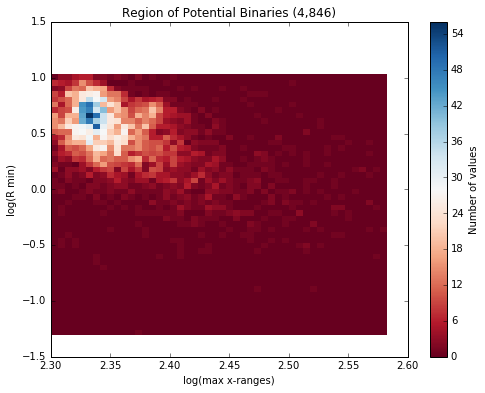

In [30]:
# Examining the region that is located (2.3,0.6). This vertical group on the far right looks like it holds potentials
# Similarily to above, let's evaluate the region on its own
threshold=np.where(np.logical_and(DR13_xr>= 200.0 , DR13_R <= 11.0))
field = DR13_field[threshold]
massID = DR13_massID[threshold]
x_range_value=DR13_xr[threshold]
R_value=DR13_R[threshold]
outage = open('DR13_Potential_Binaries_in_region(2.3,0.6).csv', 'w')
for i in range(len(field)):
    #print(DR13_massID[x])
    outage.write(str(field[i]) + ',' +str(massID[i])+','+str(x_range_value[i])+',' +str(R_value[i])+'\n')
outage.close()
print(len(DR13_massID[threshold]))

# Turn the values into log values
#outfile = open('DR13_Log_Values_for_Stars.csv','w')
x_range_values=[]
R_values=[]
for i in range(len(x_range_value)):
    x_range_values.append(math.log10(x_range_value[i]))
    R_values.append(math.log10(R_value[i]))
    #outfile.write(str(xmax[i])+'\t'+str(R[i])+'\n')     
#outfile.close()


# Let's plot the region
percentbin = 0.01
bin_count = int(percentbin*len(x_range_values))
new_grid, new_x_range, new_y_range = np.histogram2d(x_range_values, R_values, bins=bin_count, range=None, normed=False, weights=None)

new_grid = np.rot90(new_grid)
new_grid = np.flipud(new_grid)

plt.figure(figsize=(8,6))
Z = plt.pcolor(new_x_range, new_y_range,new_grid, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('Region of Potential Binaries (4,846)')
plt.savefig('Region of Potential Binaries (4,846).jpg', bbox_inches='tight')

new_max_grid  = np.argmax(new_grid)#Returns the indices of the maximum values along an axix
tc = new_max_grid%new_grid.shape[0]
td = new_max_grid/new_grid.shape[0]
# Reports the index in the large appended list where the star is located along with its associated max x-range & R min
new_indicies=find_index(x_range_values, R_values, new_x_range, new_y_range, tc, td)
print(new_indicies)

In [ ]:
# Function for generating tables for each star that has a representative visit
def TableGenerator(header, matrix,top_format, left_format, cell_format, row_delim, col_delim):
    #zip is a built in function thar returns a list of tuples where each one is the ith element from each argument 
    #sequence.
    table = [[''] + header] + [[name] + row for name, row in zip(header, matrix)] 
    #making the format suited for the parameters specifically.
    table_format = [len(header)*[top_format]] + len(matrix)*[[left_format] + len(header)*[cell_format]]
    #format is a built in that returns a string 
    col_widths = [max(len(format.format(cell, 0))
                     for format, cell in zip(col_format, col))
                  #Finding the column length in the list of tuples for a combined list of tuples
                  for col_format, col in zip(zip(*table_format), zip(*table))]
    #returning the values into a table that will present data vertically
    return row_delim.join(col_delim.join(format.format(cell, width) #Joins the columns and rows together
            for format, cell, width in zip(row_format, row, col_widths)) #Formatting the width of each column
              for row_format, row in zip(table_format, table))#Formatting the row of each entry



outfile2 = open('DR13_Tables.csv','w')
for i in range(len(x_max)):
    table = TableGenerator(['Field', '2MASSID ', 'log(max_xr)', 'log(R_min)','max_xr','R_min'],
                          [[DR13_field[i]], [DR13_massID[i]], ['%.3f'%x_max[i]], ['%.3f'%Rmin[i]],[DR13_xr[i]],[DR13_R[i]]],
                    '\n', '{:<{}}', '{:>{}}','\n', '  ')
    outfile2.write(table)
outfile2.close()

outfile3 = open("Refined_Tables.csv", 'w')
for i in range(len(revfield)):
    table2 = TableGenerator(['Field', '2MASSID ', 'log(max_xr)', 'log(R_min)','max_xr','R_min'],
                          [[revfield[i]], [revmass[i]], ['%.3f'%revx[i]], ['%.3f'%revr[i]],[xval[i]],[Rval[i]]],
                    '\n', '{:<{}}', '{:>{}}','\n', '  ')
    outfile3.write(table2)
outfile3.close()
    